In [3]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

random.seed(47)

In [4]:
# load data
combats = pd.read_csv('./Python/Data/combats.csv')
pokemons = pd.read_csv('./Python/Data/pokemon.csv')
tests = pd.read_csv('./Python/Data/tests.csv')

In [5]:
pokemons.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
print("hp range: %i - %i" % (pokemons.HP.min(), pokemons.HP.max()))
print("attack range: %i - %i" % (pokemons.Attack.min(), pokemons.Attack.max()))
print("defence range: %i - %i" % (pokemons.Defense.min(), pokemons.Defense.max()))

hp range: 1 - 255
attack range: 5 - 190
defence range: 5 - 230


In [7]:
# put range in vars
Hp = [pokemons.HP.min(), pokemons.HP.max()]
Atk = [pokemons.Attack.min(), pokemons.Attack.max()]
Def = [pokemons.Defense.min(), pokemons.Defense.max()]

In [8]:
pokemons['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
pokemons['Type 2'].unique().size

19

In [10]:
testdata = pokemons.loc[25:75,['HP','Attack','Defense','Name']]

In [11]:
testdata.values

array([[55, 81, 60, 'Raticate'],
       [40, 60, 30, 'Spearow'],
       [65, 90, 65, 'Fearow'],
       [35, 60, 44, 'Ekans'],
       [60, 85, 69, 'Arbok'],
       [35, 55, 40, 'Pikachu'],
       [60, 90, 55, 'Raichu'],
       [50, 75, 85, 'Sandshrew'],
       [75, 100, 110, 'Sandslash'],
       [55, 47, 52, 'Nidoran♀'],
       [70, 62, 67, 'Nidorina'],
       [90, 92, 87, 'Nidoqueen'],
       [46, 57, 40, 'Nidoran♂'],
       [61, 72, 57, 'Nidorino'],
       [81, 102, 77, 'Nidoking'],
       [70, 45, 48, 'Clefairy'],
       [95, 70, 73, 'Clefable'],
       [38, 41, 40, 'Vulpix'],
       [73, 76, 75, 'Ninetales'],
       [115, 45, 20, 'Jigglypuff'],
       [140, 70, 45, 'Wigglytuff'],
       [40, 45, 35, 'Zubat'],
       [75, 80, 70, 'Golbat'],
       [45, 50, 55, 'Oddish'],
       [60, 65, 70, 'Gloom'],
       [75, 80, 85, 'Vileplume'],
       [35, 70, 55, 'Paras'],
       [60, 95, 80, 'Parasect'],
       [60, 55, 50, 'Venonat'],
       [70, 65, 60, 'Venomoth'],
       [10, 55, 25, 'Dig

### Steps to take
1) Set amount of K clusters  
2) Assign each data point to closest centroid  
3) Recompute the cluster centroids(mean of all data points in cluster)  
4) back to step 2 and repeat

In [113]:
def KMeans(points, k = 3, max_iter = 10):
    # generate k random centroids
    #centroids = centroid_gen(k)
    
    # set centroids
    #centroids = {0: [40, 30, 30], 1: [70,  80,  70], 2 : [90,  100,  90]} # 3 centroids
    # centroids = {0: [40, 30, 30], 1 : [90,  100,  90]} # 2 centroids
    centroids = {0: [40, 30, 30], 1: [70,  80,  70], 2: [80,  100,  100] , 3: [90,  100,  90]} # 2 centroids # 4 centroids
    
    centroids = dict(centroids)
    change = 1 # check if centroid position changed or not

    cluster = {} 
    total_distance = {}
    
    iteration = 0
    while (iteration < max_iter) and (change == 1):
        print("\ncentroids: "+ str(centroids))
        print('Iteration: ' + str(iteration))
        for i in range(0,len(points)):
            distances = calc_dist(centroids, points[i])
            min_dist_key = min(distances, key=distances.get)
            cluster[i] = {'centroid': min_dist_key, 'distance': distances[min_dist_key], 'pokemon': points[i][3], 'centroid_arr': centroids[min_dist_key], 'hp': str(points[i][0]),"atk": str(points[i][1]), "def":str(points[i][2])}
            print('Cluster: %s , distance: %s' % (cluster[i]['centroid'], cluster[i]['distance']))
        iteration += 1
        
        # Generate list of data points + corresponding centroid
        new_centroids = {}
        new_dist = {}
        
        t = [] #
        for i in range(k):
            new_dist[i] = 0
            for j in range(len(points)):
                if i == cluster[j]['centroid']:
                    t.append([points[j][0], points[j][1], points[j][2], points[j][3], cluster[j]['centroid'], cluster[j]['distance']]) #HP, ATK, DEF, Name, Cluster
                    cluster[i]
                    
                    # sum distance of each point per centroid
                    new_dist[i] = new_dist[i] + cluster[j]['distance']
                        
            cmean = []
            for pok in t:
                if pok[4] == i:
                    cmean.append(pok[0:3])
            new_centroids[i] = np.mean(cmean, axis=0)
        centroids = new_centroids
        
        print('\n')
        print(total_distance)
        print(new_dist)
        
        if(check_change(total_distance, new_dist, k)):
            change = 0
        
        total_distance = new_dist # save new distance 
        cluster['total_dist'] = total_distance
        
    print('------------------- \n')
        
    return cluster

In [27]:
# generate k random centroids
def centroid_gen(k):
    centroids = {}
    for c in range(0,k):
        rand_hp = random.randint(Hp[0],Hp[1])
        rand_atk = random.randint(Atk[0],Atk[1])
        rand_def = random.randint(Def[0],Def[1])
        centroids[c] = np.array([rand_hp, rand_atk, rand_def])
    return centroids

In [28]:
# calculate Euclidean distance
def calc_dist(cen, p):
    distances = {}
    for k in cen:
        Sum = (cen[k][0]-p[0])**2 + (cen[k][1]-p[1])**2 + (cen[k][2]-p[2])**2
        distance = math.sqrt(Sum)
        distances[k] = distance
    return distances

In [73]:
# check if centroids postions changed
def check_change(total_dist,new_dist, k):
    if len(total_dist) > 0:
        for i in range(k):
            if total_dist[i] == new_dist[i]:
                return True

In [105]:
# return su of dictionary
def sumDict(Dict): 
    sum = 0
    for i in range(len(Dict)): 
        sum = sum + Dict[i]  
    return sum

In [74]:
# paramters: Data, Clusters, Iterations
kpokemon = KMeans(testdata.values ,3 , 40)


centroids: {0: [40, 30, 30], 1: [70, 80, 70], 2: [90, 100, 90]}
Iteration: 0
Cluster: 1 , distance: 18.05547008526779
Cluster: 0 , distance: 30.0
Cluster: 1 , distance: 12.24744871391589
Cluster: 0 , distance: 33.481338085566414
Cluster: 1 , distance: 11.224972160321824
Cluster: 0 , distance: 27.386127875258307
Cluster: 1 , distance: 20.615528128088304
Cluster: 1 , distance: 25.495097567963924
Cluster: 2 , distance: 25.0
Cluster: 0 , distance: 31.591137997862628
Cluster: 1 , distance: 18.24828759089466
Cluster: 2 , distance: 8.54400374531753
Cluster: 0 , distance: 29.410882339705484
Cluster: 1 , distance: 17.72004514666935
Cluster: 2 , distance: 15.937377450509228
Cluster: 0 , distance: 38.06573262134856
Cluster: 1 , distance: 27.09243436828813
Cluster: 0 , distance: 15.0
Cluster: 1 , distance: 7.0710678118654755
Cluster: 1 , distance: 75.82875444051551
Cluster: 2 , distance: 73.65459931328118
Cluster: 0 , distance: 15.811388300841896
Cluster: 1 , distance: 5.0
Cluster: 0 , distance: 

In [79]:
kpokemon

{0: {'centroid': 1,
  'distance': 12.563853529569087,
  'pokemon': 'Raticate',
  'centroid_arr': array([65.73684211, 74.78947368, 62.        ]),
  'hp': '55',
  'atk': '81',
  'def': '60'},
 1: {'centroid': 0,
  'distance': 12.2995492423351,
  'pokemon': 'Spearow',
  'centroid_arr': array([42.0952381 , 53.66666667, 40.33333333]),
  'hp': '40',
  'atk': '60',
  'def': '30'},
 2: {'centroid': 1,
  'distance': 15.521051739215771,
  'pokemon': 'Fearow',
  'centroid_arr': array([65.73684211, 74.78947368, 62.        ]),
  'hp': '65',
  'atk': '90',
  'def': '65'},
 3: {'centroid': 0,
  'distance': 10.19303483677327,
  'pokemon': 'Ekans',
  'centroid_arr': array([42.0952381 , 53.66666667, 40.33333333]),
  'hp': '35',
  'atk': '60',
  'def': '44'},
 4: {'centroid': 1,
  'distance': 13.644273706802784,
  'pokemon': 'Arbok',
  'centroid_arr': array([65.73684211, 74.78947368, 62.        ]),
  'hp': '60',
  'atk': '85',
  'def': '69'},
 5: {'centroid': 0,
  'distance': 7.227122007895453,
  'pokemo

In [96]:
# assign all cordinates from points
for cen in range(3):
    cens[cen] = {}
    cens[cen]['x'] = []
    cens[cen]['y'] = []
    cens[cen]['z'] = []
    for p in range(len(kpokemon) - 1):
        if kpokemon[p]['centroid'] == cen:
            cens[cen]['x'].append(float(kpokemon[p]["atk"]))
            cens[cen]['y'].append(float(kpokemon[p]["def"]))
            cens[cen]['z'].append(float(kpokemon[p]["hp"]))
            cens[cen][cen] = kpokemon[p]['centroid_arr']


In [97]:
cens

{0: {'x': [60.0,
   60.0,
   55.0,
   47.0,
   57.0,
   45.0,
   41.0,
   45.0,
   50.0,
   70.0,
   55.0,
   55.0,
   80.0,
   45.0,
   52.0,
   80.0,
   50.0,
   20.0,
   35.0,
   50.0,
   75.0],
  'y': [30.0,
   44.0,
   40.0,
   52.0,
   40.0,
   48.0,
   40.0,
   35.0,
   55.0,
   55.0,
   50.0,
   25.0,
   50.0,
   35.0,
   48.0,
   35.0,
   40.0,
   15.0,
   30.0,
   45.0,
   35.0],
  'z': [40.0,
   35.0,
   35.0,
   55.0,
   46.0,
   70.0,
   38.0,
   40.0,
   45.0,
   35.0,
   60.0,
   10.0,
   35.0,
   40.0,
   50.0,
   40.0,
   40.0,
   25.0,
   40.0,
   55.0,
   50.0],
  0: array([42.0952381 , 53.66666667, 40.33333333])},
 1: {'x': [81.0,
   90.0,
   85.0,
   90.0,
   75.0,
   62.0,
   72.0,
   76.0,
   45.0,
   80.0,
   65.0,
   95.0,
   65.0,
   70.0,
   105.0,
   70.0,
   65.0,
   50.0,
   80.0],
  'y': [60.0,
   65.0,
   69.0,
   55.0,
   85.0,
   67.0,
   57.0,
   75.0,
   20.0,
   70.0,
   70.0,
   80.0,
   60.0,
   60.0,
   60.0,
   45.0,
   65.0,
   65.0,
   50.0],


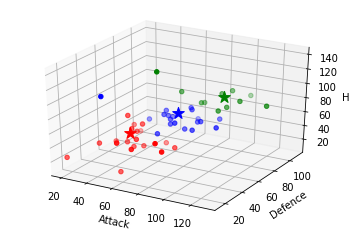

In [102]:
fig = plt.figure()
colors = ['r','b','g']
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
for c in range(len(cens)):
    ax.scatter(cens[c]['x'], cens[c]['y'], cens[c]['z'], c=colors[c], marker='o')
    ax.scatter(cens[c][c][0], cens[c][c][1], cens[c][c][2], c=colors[c], marker='*',s=150)
    
#ax.scatter(x, y, z, c='r', marker='o')
#ax.scatter([60], [60], [60], c='b', marker='o')

ax.set_xlabel('Attack')
ax.set_ylabel('Defence')
ax.set_zlabel('HP')
plt.show()

<br>

In [106]:
print('Total distance: ', sumDict(kpokemon['total_dist']))

Total distance:  1019.8396847664068


**------2 clusters**

In [108]:
kpokemon2 = KMeans(testdata.values ,2 , 40)


centroids: {0: [40, 30, 30], 1: [90, 100, 90]}
Iteration: 0
Cluster: 1 , distance: 49.85980344927164
Cluster: 0 , distance: 30.0
Cluster: 1 , distance: 36.742346141747674
Cluster: 0 , distance: 33.481338085566414
Cluster: 1 , distance: 39.57271787481876
Cluster: 0 , distance: 27.386127875258307
Cluster: 1 , distance: 47.16990566028302
Cluster: 1 , distance: 47.43416490252569
Cluster: 1 , distance: 25.0
Cluster: 0 , distance: 31.591137997862628
Cluster: 1 , distance: 48.7134478352744
Cluster: 1 , distance: 8.54400374531753
Cluster: 0 , distance: 29.410882339705484
Cluster: 1 , distance: 52.09606511052442
Cluster: 1 , distance: 15.937377450509228
Cluster: 0 , distance: 38.06573262134856
Cluster: 1 , distance: 34.84250278036869
Cluster: 0 , distance: 15.0
Cluster: 1 , distance: 33.015148038438355
Cluster: 0 , distance: 77.13624310270757
Cluster: 1 , distance: 73.65459931328118
Cluster: 0 , distance: 15.811388300841896
Cluster: 1 , distance: 32.01562118716424
Cluster: 0 , distance: 32.403

In [109]:
print('Total distance: ', sumDict(kpokemon2['total_dist']))

Total distance:  1165.3158996120978


In [114]:
kpokemon4 = KMeans(testdata.values ,4 , 40)


centroids: {0: [40, 30, 30], 1: [70, 80, 70], 2: [80, 100, 100], 3: [90, 100, 90]}
Iteration: 0
Cluster: 1 , distance: 18.05547008526779
Cluster: 0 , distance: 30.0
Cluster: 1 , distance: 12.24744871391589
Cluster: 0 , distance: 33.481338085566414
Cluster: 1 , distance: 11.224972160321824
Cluster: 0 , distance: 27.386127875258307
Cluster: 1 , distance: 20.615528128088304
Cluster: 1 , distance: 25.495097567963924
Cluster: 2 , distance: 11.180339887498949
Cluster: 0 , distance: 31.591137997862628
Cluster: 1 , distance: 18.24828759089466
Cluster: 3 , distance: 8.54400374531753
Cluster: 0 , distance: 29.410882339705484
Cluster: 1 , distance: 17.72004514666935
Cluster: 3 , distance: 15.937377450509228
Cluster: 0 , distance: 38.06573262134856
Cluster: 1 , distance: 27.09243436828813
Cluster: 0 , distance: 15.0
Cluster: 1 , distance: 7.0710678118654755
Cluster: 1 , distance: 75.82875444051551
Cluster: 3 , distance: 73.65459931328118
Cluster: 0 , distance: 15.811388300841896
Cluster: 1 , dist

In [115]:
print('Total distance: ', sumDict(kpokemon4['total_dist']))

Total distance:  1001.0055096729773


In [120]:
# assign all cordinates from points
for cen in range(4):
    cens[cen] = {}
    cens[cen]['x'] = []
    cens[cen]['y'] = []
    cens[cen]['z'] = []
    for p in range(len(kpokemon) - 1):
        if kpokemon4[p]['centroid'] == cen:
            cens[cen]['x'].append(float(kpokemon4[p]["atk"]))
            cens[cen]['y'].append(float(kpokemon4[p]["def"]))
            cens[cen]['z'].append(float(kpokemon4[p]["hp"]))
            cens[cen][cen] = kpokemon4[p]['centroid_arr']


In [124]:
cens

{0: {'x': [60.0,
   60.0,
   55.0,
   47.0,
   57.0,
   45.0,
   41.0,
   45.0,
   50.0,
   70.0,
   55.0,
   55.0,
   80.0,
   45.0,
   52.0,
   80.0,
   50.0,
   20.0,
   35.0,
   50.0,
   75.0],
  'y': [30.0,
   44.0,
   40.0,
   52.0,
   40.0,
   48.0,
   40.0,
   35.0,
   55.0,
   55.0,
   50.0,
   25.0,
   50.0,
   35.0,
   48.0,
   35.0,
   40.0,
   15.0,
   30.0,
   45.0,
   35.0],
  'z': [40.0,
   35.0,
   35.0,
   55.0,
   46.0,
   70.0,
   38.0,
   40.0,
   45.0,
   35.0,
   60.0,
   10.0,
   35.0,
   40.0,
   50.0,
   40.0,
   40.0,
   25.0,
   40.0,
   55.0,
   50.0],
  0: array([42.45, 52.35, 39.85])},
 1: {'x': [81.0,
   90.0,
   85.0,
   90.0,
   75.0,
   62.0,
   72.0,
   76.0,
   45.0,
   80.0,
   65.0,
   80.0,
   95.0,
   65.0,
   70.0,
   105.0,
   70.0,
   65.0,
   50.0,
   80.0],
  'y': [60.0,
   65.0,
   69.0,
   55.0,
   85.0,
   67.0,
   57.0,
   75.0,
   20.0,
   70.0,
   70.0,
   85.0,
   80.0,
   60.0,
   60.0,
   60.0,
   45.0,
   65.0,
   65.0,
   50.0],


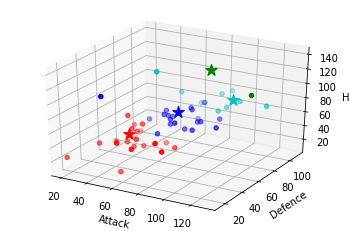

In [128]:
fig = plt.figure()
colors = ['r','b','g','c']
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
for c in range(len(cens)):
    ax.scatter(cens[c]['x'], cens[c]['y'], cens[c]['z'], c=colors[c], marker='o')
    ax.scatter(cens[c][c][0], cens[c][c][1], cens[c][c][2], c=colors[c], marker='*',s=150)

ax.set_xlabel('Attack')
ax.set_ylabel('Defence')
ax.set_zlabel('HP')
plt.show()